Inspection of the Main Image

In [1]:
import cv2 as cv
import imghdr
import numpy as np

image_format = imghdr.what('rose.jpeg')  
print("Image Header (format):", image_format)
import imghdr

with open("rose.jpeg", "rb") as f:
    jpeg_data = f.read()

header = jpeg_data[:2]
bitstream = jpeg_data[2:]

bitstream_array = np.frombuffer(bitstream, dtype=np.uint8)

print("Header:", header)
print("Header (hexadecimal):", header.hex())
print("Bitstream Length:", len(bitstream))
print("Bitstream (first 100 bytes):", bitstream[:100])
print("Bitstream Array (first 10 elements):", bitstream_array[:10])


Image Header (format): jpeg
Header: b'\xff\xd8'
Header (hexadecimal): ffd8
Bitstream Length: 37336
Bitstream (first 100 bytes): b'\xff\xdb\x00\x84\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!2222222222222222'
Bitstream Array (first 10 elements): [255 219   0 132   0   8   6   6   7   6]


C:\Users\RayanTech\AppData\Local\Temp\ipykernel_3956\1206823877.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [3]:
print(image.shape)

(460, 460, 3)


Check for Compression

In [2]:
import io

with open("rose.jpeg", "rb") as f:
    jpeg_data = f.read()

header = jpeg_data[:2]
header_hex = header.hex()
compression_algorithm = None

if header_hex.startswith('ff'):
    if header_hex[2:] == 'd8':
        compression_algorithm = "Baseline DCT"
    elif header_hex[2:] == 'e0':
        compression_algorithm = "JFIF (JPEG File Interchange Format)"

if compression_algorithm:
    print("Compression Algorithm:", compression_algorithm)
else:
    print("Compression Algorithm: Unknown")

Compression Algorithm: Baseline DCT


Report:
An approach to extract compression algorithm is to make use of the file's metadata. So we read the first 2 bytes of the image (which is the header) and then convert it to a more readable HEX form.

Compression

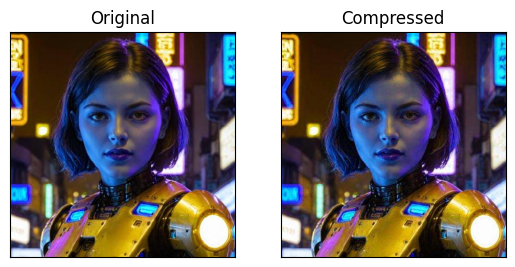

In [3]:
import matplotlib.pyplot as plt

QUALITY_PARAM = 60

def compress_image(image_path, quality):
    img = cv.imread(image_path)
    encode_param = [int(cv.IMWRITE_JPEG_QUALITY), quality]
    _, encoded_img = cv.imencode('.jpeg', img, encode_param)
    decoded_img = cv.imdecode(encoded_img, cv.IMREAD_COLOR)
    cv.imwrite("compressed.jpeg" , decoded_img)
    return decoded_img

original_img = cv.imread('rose.jpeg')
compressed_img = compress_image('rose.jpeg', quality=QUALITY_PARAM)

plt.subplot(121)
plt.imshow(original_img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(compressed_img, cmap='gray')
plt.title('Compressed'), plt.xticks([]), plt.yticks([])

plt.show()


Report:
By decresing th eQuality parameter, the compressed image's quality falls.